<a href="https://colab.research.google.com/github/ShubhamGupta2505/Deep_Learning_Practice/blob/main/LSTM_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
!wget --no-check-certificate \
    https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P -O /tmp/sentiment.csv

--2023-05-19 09:12:23--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 142.251.8.102, 142.251.8.101, 142.251.8.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ip1djeaajgkhgaef9rebavql1b41hm8o/1684487475000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=3d4370f1-6213-44b6-87b7-f5e1770d6106 [following]
--2023-05-19 09:12:24--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ip1djeaajgkhgaef9rebavql1b41hm8o/1684487475000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=3d4370f1-6213-44b6-87b7-f5e1770d6106
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 74.125.203.132, 2404:6800:4008:c03::84
Connecting to doc-08-ak-

In [5]:
import pandas as pd
dataset = pd.read_csv('/tmp/sentiment.csv')
dataset.head()

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


In [6]:
dataset.shape

(1992, 3)

In [7]:
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

In [9]:
for x in range(7):
  print(sentences[x])
  print(labels[x])

So there is no way for me to plug it in here in the US unless I go by a converter.
0
Good case Excellent value.
1
Great for the jawbone.
1
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
0
The mic is great.
1
I have to jiggle the plug to get it to line up right to get decent volume.
0
If you have several dozen or several hundred contacts then imagine the fun of sending each of them one by one.
0


In [11]:
import tensorflow_datasets as tfds
vocab_size =1000
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentences,vocab_size,max_subword_length=5)

In [12]:
print("tokenizer size is ",tokenizer.vocab_size)

tokenizer size is  999


In [15]:
num = 50
print(sentences[num])
encoded = tokenizer.encode(sentences[num])
print(encoded)

Not loud enough and doesn't turn on like it should.
[385, 140, 637, 775, 403, 44, 2, 197, 60, 853, 782, 8, 389, 775, 27, 65, 14, 328, 503, 789]


In [17]:
for i in encoded:
  print(tokenizer.decode([i]))

Not 
lo
ud
 
enoug
h 
and 
do
es
n
'
t 
turn
 
on 
like 
it 
sho
uld
.


In [19]:
for i,sentence in enumerate(sentences):
  sentences[i] = tokenizer.encode(sentence)

In [21]:
sentences[50]

[385,
 140,
 637,
 775,
 403,
 44,
 2,
 197,
 60,
 853,
 782,
 8,
 389,
 775,
 27,
 65,
 14,
 328,
 503,
 789]

In [22]:
import numpy as np
max_length = 50
padding_type = "post"
trunc_type = "post"

sequences_padded = pad_sequences(sentences,padding = padding_type,truncating = trunc_type,maxlen = max_length)

In [24]:
training_size = int(len(sentences) * 0.8)


training_sequences = sequences_padded[0:training_size]
testing_sequences = sequences_padded[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size :]


In [25]:
training_labels_f = np.array(training_labels)
testing_labels_f = np.array(testing_labels)

In [26]:
training_labels_f

array([0, 1, 1, ..., 1, 0, 1])

In [27]:
embedding_dim =16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 16,109
Trainable params: 16,109
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
epochs =30
history = model.fit(training_sequences,training_labels_f,epochs=epochs,validation_data=(testing_sequences,testing_labels_f))

Epoch 1/30
50/50 [==============================] - 1s 13ms/step - loss: 0.1603 - accuracy: 0.9567 - val_loss: 0.6458 - val_accuracy: 0.7343
Epoch 2/30
50/50 [==============================] - 0s 4ms/step - loss: 0.1548 - accuracy: 0.9561 - val_loss: 0.6125 - val_accuracy: 0.7519
Epoch 3/30
50/50 [==============================] - 0s 3ms/step - loss: 0.1497 - accuracy: 0.9611 - val_loss: 0.6348 - val_accuracy: 0.7519
Epoch 4/30
50/50 [==============================] - 0s 3ms/step - loss: 0.1487 - accuracy: 0.9586 - val_loss: 0.6365 - val_accuracy: 0.7569
Epoch 5/30
50/50 [==============================] - 0s 3ms/step - loss: 0.1404 - accuracy: 0.9636 - val_loss: 0.6607 - val_accuracy: 0.7419
Epoch 6/30
50/50 [==============================] - 0s 4ms/step - loss: 0.1354 - accuracy: 0.9617 - val_loss: 0.6627 - val_accuracy: 0.7519
Epoch 7/30
50/50 [==============================] - 0s 3ms/step - loss: 0.1317 - accuracy: 0.9655 - val_loss: 0.6881 - val_accuracy: 0.7444
Epoch 8/30
50/50 [=

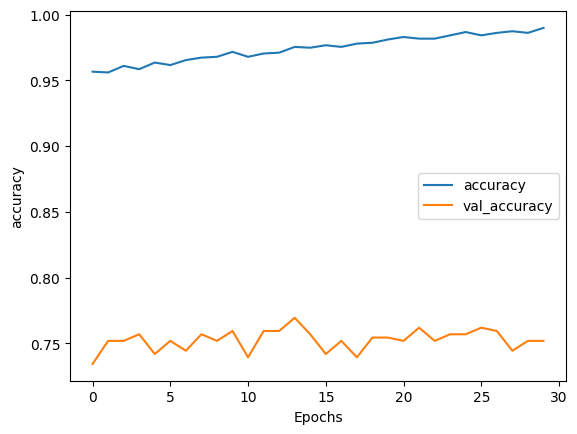

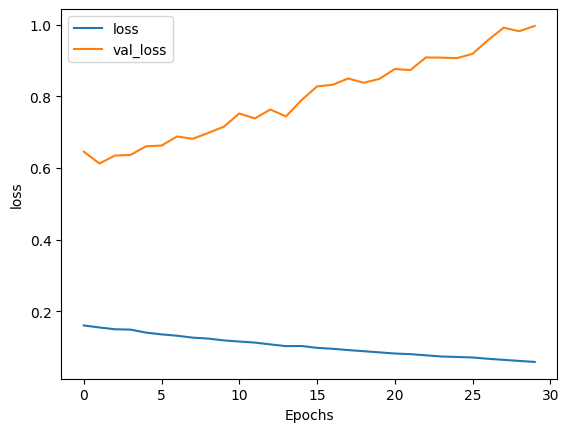

In [35]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [40]:
# Define a function to take a series of reviews
# and predict whether each one is a positive or negative review

# max_length = 100 # previously defined

def predict_review(model, new_sentences, maxlen=max_length, show_padded_sequence=True ):
  # Keep the original sentences so that we can keep using them later
  # Create an array to hold the encoded sequences
  new_sequences = []

  # Convert the new reviews to sequences
  for i, frvw in enumerate(new_sentences):
    new_sequences.append(tokenizer.encode(frvw))

  trunc_type='post' 
  padding_type='post'

  # Pad all sequences for the new reviews
  new_reviews_padded = pad_sequences(new_sequences, maxlen=max_length, 
                                 padding=padding_type, truncating=trunc_type)             

  classes = model.predict(new_reviews_padded)

  # The closer the class is to 1, the more positive the review is
  for x in range(len(new_sentences)):
    
    # We can see the padded sequence if desired
    # Print the sequence
    if (show_padded_sequence):
      print(new_reviews_padded[x])
    # Print the review as text
    print(new_sentences[x])
    # Print its predicted class
    print(classes[x])
    print("\n")

In [41]:
# Use the model to predict some reviews   
fake_reviews = ["I love this phone", 
                "Everything was cold",
                "Everything was hot exactly as I wanted", 
                "Everything was green", 
                "the host seated us immediately",
                "they gave us free chocolate cake", 
                "we couldn't hear each other talk because of the shouting in the kitchen"
              ]

predict_review(model, fake_reviews)


1/1 [==============================] - 0s 24ms/step
[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.9889933]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.00354061]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.25673574]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything 

In [68]:
def fit_model_now (model, sentences) :
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  model.summary()
  history = model.fit(training_sequences, training_labels_f, epochs=epochs, 
                      validation_data=(testing_sequences, testing_labels_f))
  return history

def plot_results (history):
  plot_graphs(history, "accuracy")
  plot_graphs(history, "loss")

def fit_model_and_show_results (model, sentences):
  history = fit_model_now(model, sentences)
  plot_results(history)
  predict_review(model, sentences)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 50, 16)            16000     
                                                                 
 bidirectional_8 (Bidirectio  (None, 32)               4224      
 nal)                                                            
                                                                 
 dense_18 (Dense)            (None, 6)                 198       
                                                                 
 dense_19 (Dense)            (None, 1)                 7         
                                                                 
Total params: 20,429
Trainable params: 20,429
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
50/50 [==============================] - 8s 54ms/step - loss: 0.6929 - accuracy: 0.5072 - val_loss: 0.694

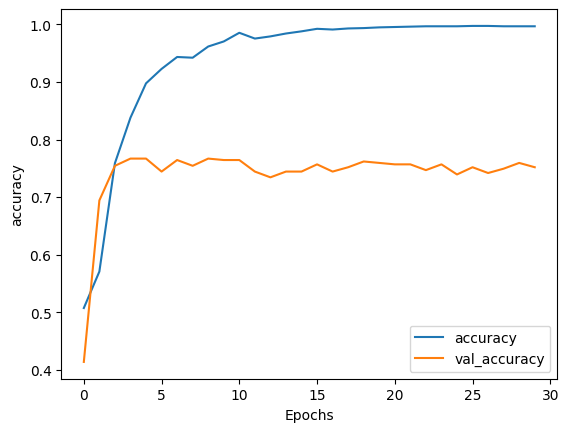

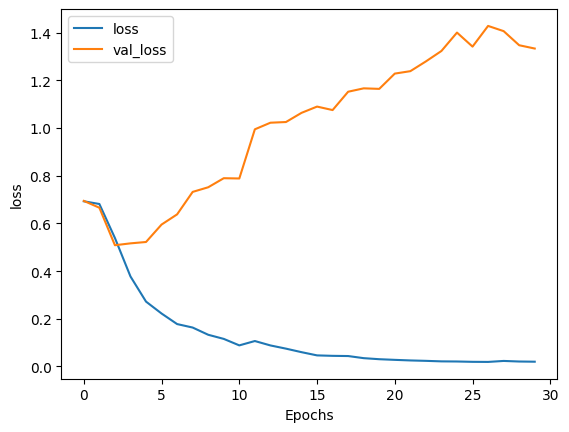

1/1 [==============================] - 1s 809ms/step
[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.9980114]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.0079385]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.17994495]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything 

In [69]:
# Define the model
model_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)), 
    tf.keras.layers.Dense(6, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile and train the model and then show the predictions for our extra sentences
fit_model_and_show_results(model_bidi_lstm, fake_reviews)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 50, 16)            16000     
                                                                 
 bidirectional_9 (Bidirectio  (None, 50, 32)           4224      
 nal)                                                            
                                                                 
 bidirectional_10 (Bidirecti  (None, 32)               6272      
 onal)                                                           
                                                                 
 dense_20 (Dense)            (None, 6)                 198       
                                                                 
 dense_21 (Dense)            (None, 1)                 7         
                                                                 
Total params: 26,701
Trainable params: 26,701
Non-tra

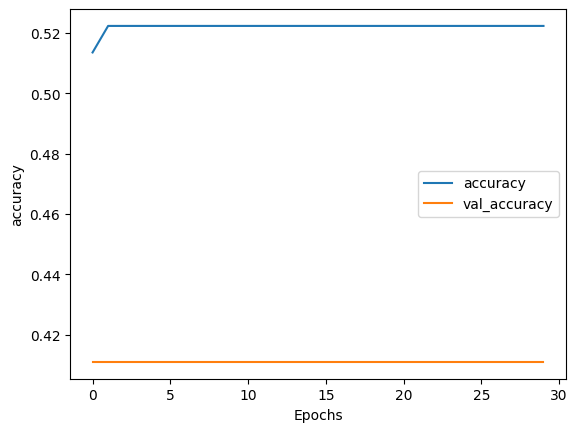

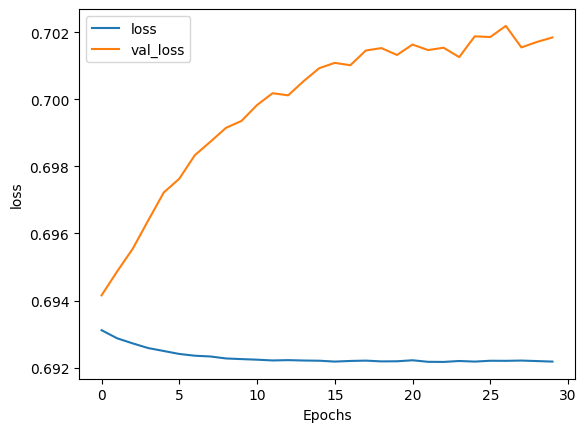

1/1 [==============================] - 2s 2s/step
[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.5217559]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.5217559]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.5217559]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was 

In [70]:
model_multiple_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, 
                                                       return_sequences=True)), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

fit_model_and_show_results(model_multiple_bidi_lstm, fake_reviews)

In [71]:
my_reviews =["lovely", "dreadful", "stay away",
             "everything was hot exactly as I wanted",
             "everything was not exactly as I wanted",
             "they gave us free chocolate cake",
             "I've never eaten anything so spicy in my life, my throat burned for hours",
             "for a phone that is as expensive as this one I expect it to be much easier to use than this thing is",
             "we left there very full for a low price so I'd say you just can't go wrong at this place",
             "that place does not have quality meals and it isn't a good place to go for dinner",
             ]

In [72]:
print("===================================\n","Embeddings only:\n", "===================================",)
predict_review(model, my_reviews, show_padded_sequence=False)

 Embeddings only:
1/1 [==============================] - 0s 22ms/step
lovely
[0.99394584]


dreadful
[0.01796509]


stay away
[0.5348056]


everything was hot exactly as I wanted
[0.9374491]


everything was not exactly as I wanted
[0.6858609]


they gave us free chocolate cake
[0.90520227]


I've never eaten anything so spicy in my life, my throat burned for hours
[0.00736136]


for a phone that is as expensive as this one I expect it to be much easier to use than this thing is
[0.31091243]


we left there very full for a low price so I'd say you just can't go wrong at this place
[0.13317306]


that place does not have quality meals and it isn't a good place to go for dinner
[0.9149447]




In [73]:
print("===================================\n", "With a single bidirectional LSTM:\n", "===================================")
predict_review(model_bidi_lstm, my_reviews, show_padded_sequence=False)

 With a single bidirectional LSTM:
1/1 [==============================] - 0s 30ms/step
lovely
[0.99416304]


dreadful
[0.00548145]


stay away
[0.12403547]


everything was hot exactly as I wanted
[0.45977527]


everything was not exactly as I wanted
[0.00761816]


they gave us free chocolate cake
[0.97915834]


I've never eaten anything so spicy in my life, my throat burned for hours
[0.01004014]


for a phone that is as expensive as this one I expect it to be much easier to use than this thing is
[0.08349803]


we left there very full for a low price so I'd say you just can't go wrong at this place
[0.9999291]


that place does not have quality meals and it isn't a good place to go for dinner
[0.05322073]




In [74]:
print("===================================\n","With two bidirectional LSTMs:\n", "===================================")
predict_review(model_multiple_bidi_lstm, my_reviews, show_padded_sequence=False)

 With two bidirectional LSTMs:
1/1 [==============================] - 0s 33ms/step
lovely
[0.52175593]


dreadful
[0.52175593]


stay away
[0.52175593]


everything was hot exactly as I wanted
[0.52175593]


everything was not exactly as I wanted
[0.52175593]


they gave us free chocolate cake
[0.52175593]


I've never eaten anything so spicy in my life, my throat burned for hours
[0.52175593]


for a phone that is as expensive as this one I expect it to be much easier to use than this thing is
[0.52175593]


we left there very full for a low price so I'd say you just can't go wrong at this place
[0.5217559]


that place does not have quality meals and it isn't a good place to go for dinner
[0.5217559]


